In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pymannkendall import original_test

from dataflow import df_train, df_test, df_geography, df_product


In [24]:
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


,ProductID,Date,Zip,Units,Revenue,COGS,City,State,Region,District,Category,Segment,Product
0,1228,2013-07-31,78773,12,19648.44,12309.747660,"Austin, TX",TX,Central,District #23,Urban,Convenience,Pirum UC-30
1,781,2014-03-12,90501,16,20351.52,13497.128064,"Torrance, CA",CA,West,District #37,Rural,Productivity,Natura RP-69
2,2090,2013-11-29,44460,26,111367.62,91488.499830,"Salem, OH",OH,East,District #14,Urban,Convenience,Currus UC-25
3,1116,2018-08-29,30122,12,36280.44,21967.806420,"Lithia Springs, GA",GA,East,District #09,Rural,Select,Pirum RS-04
4,993,2013-04-27,75789,14,55557.18,48645.866808,"Troup, TX",TX,Central,District #24,Urban,Convenience,Natura UC-56


`Segment` (Phân khúc):
- Productivity: Hướng đến khách hàng tìm kiếm sản phẩm tăng năng suất công việc hoặc cuộc sống.
- Convenience: Dành cho khách hàng ưu tiên sự tiện lợi, dễ sử dụng và tiết kiệm thời gian.
- Moderation: Nhắm đến khách hàng có nhu cầu tiêu dùng trung bình, cân bằng giữa giá cả và chất lượng.
- Extreme: Dành cho khách hàng có nhu cầu cao, sẵn sàng chi trả cho các sản phẩm cao cấp.
- Youth: Dành cho khách hàng trẻ tuổi, thích các sản phẩm thời trang, sáng tạo và theo xu hướng.
- Select: Nhắm đến khách hàng chọn lọc, tìm kiếm sản phẩm đặc biệt nhưng không quá xa xỉ.
- All Season: Các sản phẩm sử dụng quanh năm, không phụ thuộc vào mùa vụ.
- Regular: Dành cho khách hàng tìm kiếm sản phẩm ổn định, bền bỉ và lâu dài.

`Category` (Danh mục):
- Urban: Sản phẩm phục vụ nhu cầu tiêu dùng ở các khu vực đô thị với cơ sở hạ tầng phát triển.
- Rural: Sản phẩm phục vụ khách hàng ở khu vực nông thôn với nhu cầu cơ bản và giá cả hợp lý.
- Mix: Sản phẩm phù hợp cho cả thành thị và nông thôn, hoặc sự kết hợp giữa các yếu tố khác nhau.
- Youth: Sản phẩm nhắm đến giới trẻ, yêu thích sự sáng tạo, thời trang và xu hướng mới.

# I. Category


## 1. Kiểm tra dữ liệu cơ bản

In [26]:
# Xem thông tin tổng quan về dataframe
print(df.info())

# Kiểm tra số lượng giá trị thiếu trong cột Category
print(df["Category"].isnull().sum())

# Xem phân phối các giá trị trong cột Category
print(df["Category"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB
None
0
Category
Urban    502142
Rural    322288
Youth     46678
Mix       30453
Name: c

In [49]:
import pandas as pd

# Giả sử df là DataFrame của bạn

# Group theo Category và tính tổng Revenue
category_summary = df.groupby('Category').agg(
    Date = ('Date', 'count'),
    Units = ('Units', 'sum'),
    Revenue =('Revenue', 'sum'),
    COGS=('COGS', 'sum')
).reset_index()

# Tính lợi nhuận cho mỗi nhóm Category
category_summary['Profit'] = category_summary['Revenue'] - category_summary['COGS']

# Tính biên lợi nhuận cho mỗi nhóm Category
category_summary['Profit_margin'] = category_summary['Profit'] / category_summary['Revenue']
# Kết quả
print(category_summary)


  Category    Date   Units       Revenue          COGS        Profit  \
0      Mix   30453   31202  1.396240e+08  1.235473e+08  1.607665e+07   
1    Rural  322288  337510  7.654201e+08  6.147657e+08  1.506544e+08   
2    Urban  502142  511467  4.086870e+09  3.369569e+09  7.173006e+08   
3    Youth   46678   48695  1.046117e+08  8.203628e+07  2.257547e+07   

   Profit_margin  
0       0.115142  
1       0.196826  
2       0.175513  
3       0.215802  


C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_13636\292713161.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_summary["Category"], rotation=45, ha="right")
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_13636\292713161.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_summary["Category"], rotation=45, ha="right")
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_13636\292713161.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_summary["Category"], rotation=45, ha="right")
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_13636\292713161.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

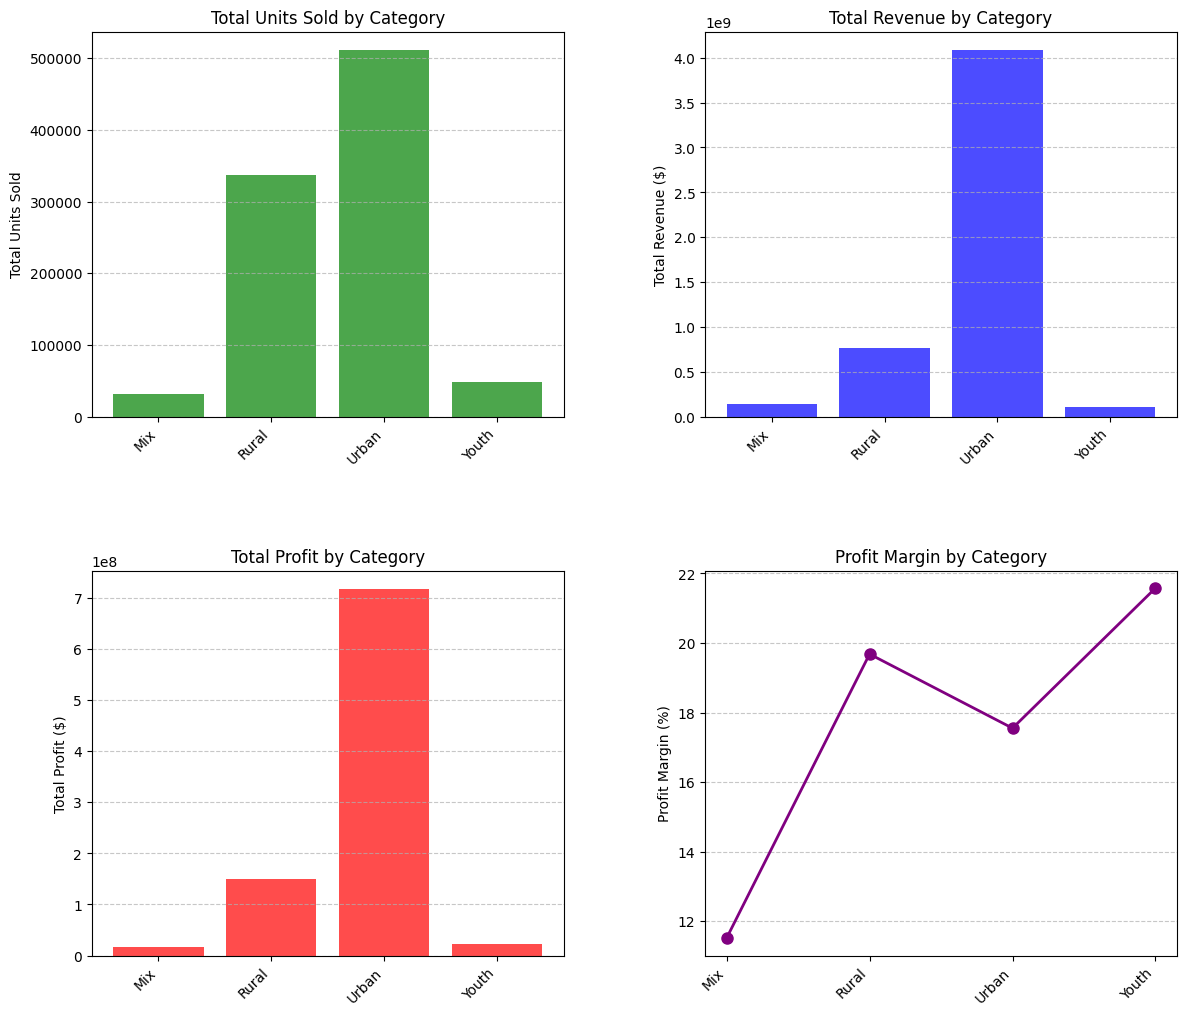

In [29]:
# Tính lợi nhuận và biên lợi nhuận
category_summary["total_profit"] = category_summary["total_revenue"] - category_summary["total_cogs"]
category_summary["profit_margin"] = category_summary["total_profit"] / category_summary["total_revenue"] * 100  # Đổi sang %

# Thiết lập figure và subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 hàng, 2 cột
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Điều chỉnh khoảng cách giữa các biểu đồ

# Biểu đồ 1: Tổng số đơn vị bán ra theo Category
axes[0, 0].bar(category_summary["Category"], category_summary["total_units"], color='g', alpha=0.7)
axes[0, 0].set_ylabel("Total Units Sold")
axes[0, 0].set_title("Total Units Sold by Category")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ 2: Tổng doanh thu theo Category
axes[0, 1].bar(category_summary["Category"], category_summary["total_revenue"], color='b', alpha=0.7)
axes[0, 1].set_ylabel("Total Revenue ($)")
axes[0, 1].set_title("Total Revenue by Category")
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ 3: Tổng lợi nhuận theo Category
axes[1, 0].bar(category_summary["Category"], category_summary["total_profit"], color='r', alpha=0.7)
axes[1, 0].set_ylabel("Total Profit ($)")
axes[1, 0].set_title("Total Profit by Category")
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ 4: Biên lợi nhuận theo Category
axes[1, 1].plot(category_summary["Category"], category_summary["profit_margin"], color='purple', marker='o', linestyle='-', linewidth=2, markersize=8)
axes[1, 1].set_ylabel("Profit Margin (%)")
axes[1, 1].set_title("Profit Margin by Category")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Xoay nhãn trục x để dễ đọc
for ax in axes.flat:
    ax.set_xticklabels(category_summary["Category"], rotation=45, ha="right")

# Hiển thị biểu đồ
plt.show()


## 2. Kiểm tra dữ liệu ngoại lệ (outliers)

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_13636\2179893918.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Category", y="total_units", data=category_summary, inner="quartile", scale="width", ax=axes[0, 0], palette="coolwarm")
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_13636\2179893918.py:33: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Category", y="total_units", data=category_summary, inner="quartile", scale="width", ax=axes[0, 0], palette="coolwarm")
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_13636\2179893918.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s

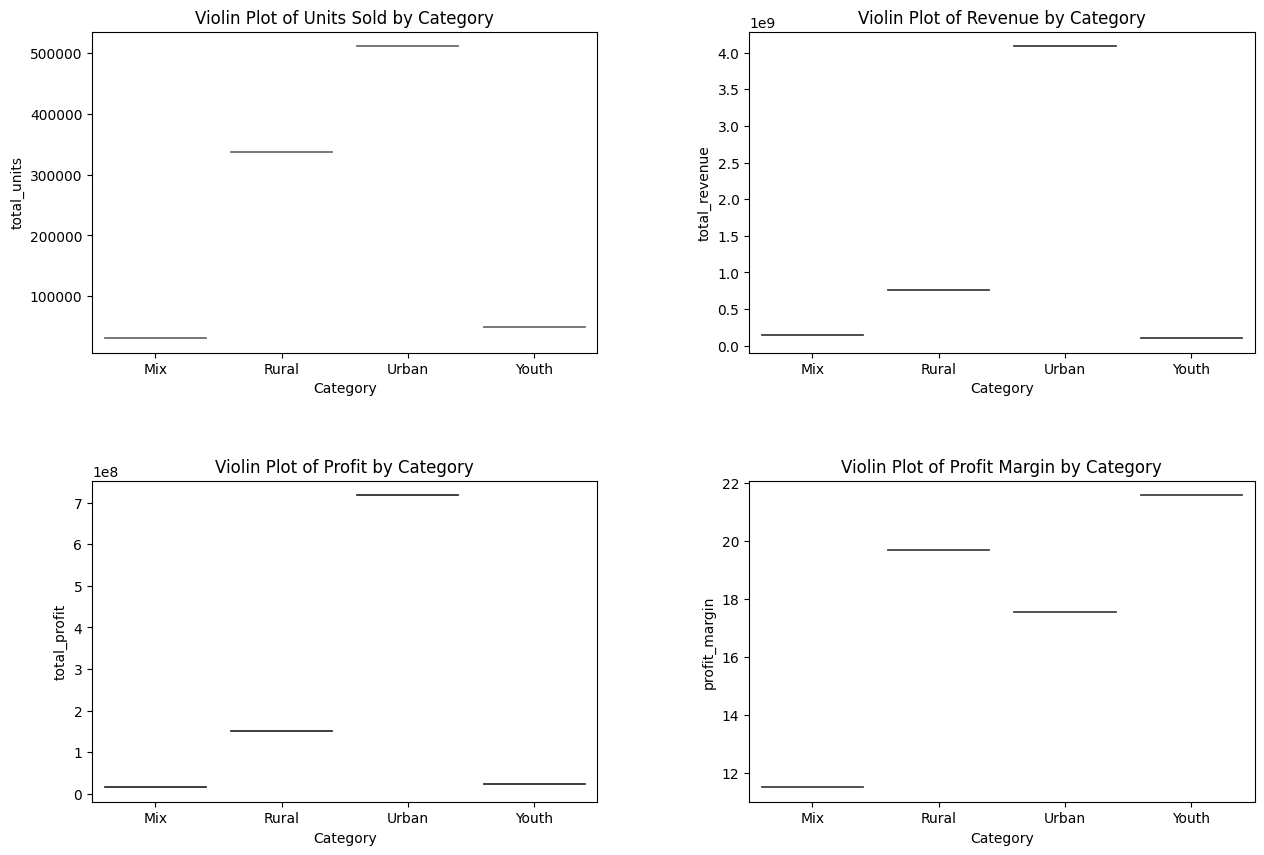

Outliers detected using IQR (Units):
Empty DataFrame
Columns: [Category, total_units, total_revenue, total_cogs, total_profit, profit_margin, z_total_units, z_total_revenue, z_total_profit]
Index: []

Outliers detected using IQR (Revenue):
  Category  total_units  total_revenue    total_cogs  total_profit  \
2    Urban       511467   4.086870e+09  3.369569e+09  7.173006e+08   

   profit_margin  z_total_units  z_total_revenue  z_total_profit  
2      17.551344       1.382679         1.709787        1.701784  

Outliers detected using IQR (Profit):
  Category  total_units  total_revenue    total_cogs  total_profit  \
2    Urban       511467   4.086870e+09  3.369569e+09  7.173006e+08   

   profit_margin  z_total_units  z_total_revenue  z_total_profit  
2      17.551344       1.382679         1.709787        1.701784  

Outliers detected using Z-score (Units):
Empty DataFrame
Columns: [Category, total_units, total_revenue, total_cogs, total_profit, profit_margin, z_total_units, z_total_r

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Bước 3: Xử lý ngoại lệ - Sử dụng IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Phát hiện ngoại lệ với IQR
outliers_units = detect_outliers_iqr(category_summary, "total_units")
outliers_revenue = detect_outliers_iqr(category_summary, "total_revenue")
outliers_profit = detect_outliers_iqr(category_summary, "total_profit")

# Bước 4: Xử lý ngoại lệ - Sử dụng Z-score
category_summary["z_total_units"] = zscore(category_summary["total_units"])
category_summary["z_total_revenue"] = zscore(category_summary["total_revenue"])
category_summary["z_total_profit"] = zscore(category_summary["total_profit"])

outliers_units_z = category_summary[category_summary["z_total_units"].abs() > 3]
outliers_revenue_z = category_summary[category_summary["z_total_revenue"].abs() > 3]
outliers_profit_z = category_summary[category_summary["z_total_profit"].abs() > 3]

# Bước 5: Vẽ biểu đồ violin plot cho các chỉ số
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Violin plot cho total_units
sns.violinplot(x="Category", y="total_units", data=category_summary, inner="quartile", scale="width", ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Violin Plot of Units Sold by Category")

# Violin plot cho total_revenue
sns.violinplot(x="Category", y="total_revenue", data=category_summary, inner="quartile", scale="width", ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Violin Plot of Revenue by Category")

# Violin plot cho total_profit
sns.violinplot(x="Category", y="total_profit", data=category_summary, inner="quartile", scale="width", ax=axes[1, 0], palette="magma")
axes[1, 0].set_title("Violin Plot of Profit by Category")

# Violin plot cho profit_margin
sns.violinplot(x="Category", y="profit_margin", data=category_summary, inner="quartile", scale="width", ax=axes[1, 1], palette="Blues")
axes[1, 1].set_title("Violin Plot of Profit Margin by Category")

plt.show()

# In các ngoại lệ phát hiện được
print("Outliers detected using IQR (Units):")
print(outliers_units)
print("\nOutliers detected using IQR (Revenue):")
print(outliers_revenue)
print("\nOutliers detected using IQR (Profit):")
print(outliers_profit)

print("\nOutliers detected using Z-score (Units):")
print(outliers_units_z)
print("\nOutliers detected using Z-score (Revenue):")
print(outliers_revenue_z)
print("\nOutliers detected using Z-score (Profit):")
print(outliers_profit_z)
